In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Defining city and month names
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
city_names = ['Ho Chi Minh', 'Tokyo', 'Sydney']

# Defining the temperature for each city
HoChiMinh = np.array([6, 8, 11, 16, 21, 25, 27, 26, 23, 17, 10, 6], dtype=int)
Tokyo = np.array([4, 6, 12, 17, 21, 25, 28, 27, 23, 17, 11, 6], dtype=int)
Sydney = np.array([9, 11, 13, 15, 18, 21, 23, 23, 21, 17, 13, 9], dtype=int)

# Initialise an array for the cities
cities = np.array([HoChiMinh, Tokyo, Sydney], dtype=int)

print(cities)

[[ 6  8 11 16 21 25 27 26 23 17 10  6]
 [ 4  6 12 17 21 25 28 27 23 17 11  6]
 [ 9 11 13 15 18 21 23 23 21 17 13  9]]


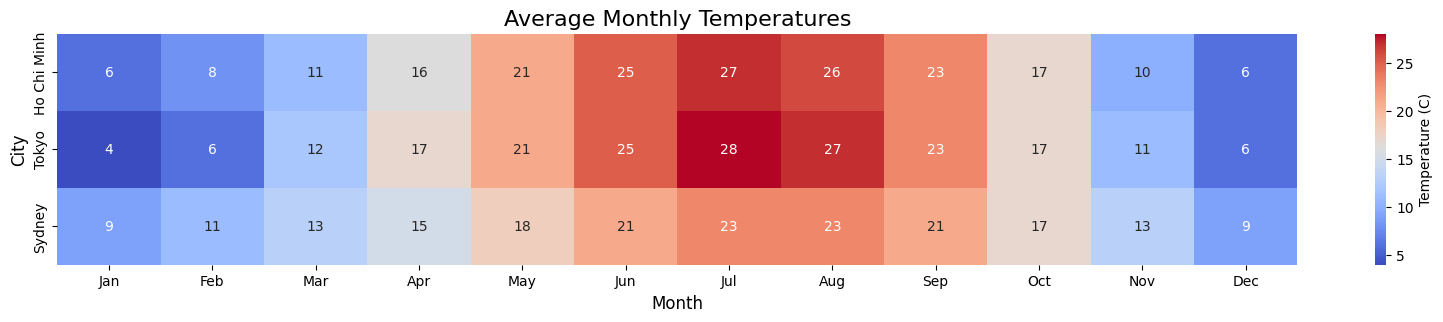

In [5]:
# Initialized dataframe for the heatmap with months as columns and cities names as index
df = pd.DataFrame(cities, index=city_names, columns=months)

# Visualize the heatmap
plt.figure(figsize=(20, 3))
# annot is for visualise data in each heatmap cells
sns.heatmap(df, annot=True, cmap="coolwarm", cbar_kws={'label': 'Temperature (C)'}) 
plt.title("Average Monthly Temperatures", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("City", fontsize=12)
plt.show()

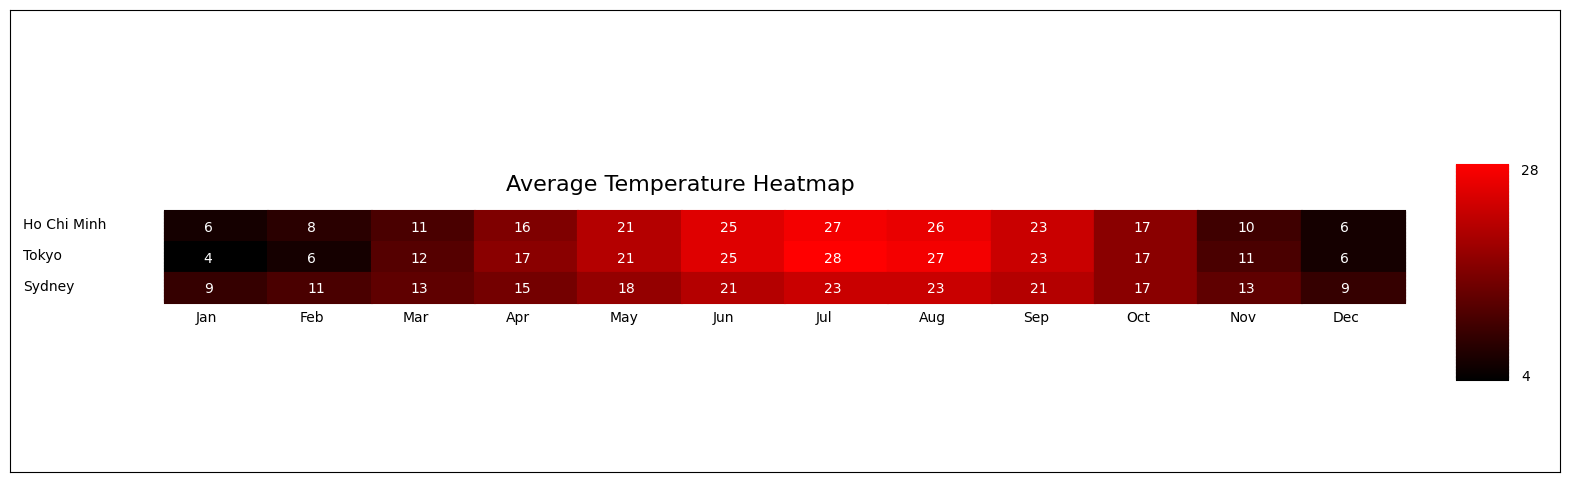

In [8]:
# This subroutine encapsulates the 'plot' method, as the most suitable for raster rendering
def DrawBox(x, y, size, r, g, b):
    for i in range(0, int(size)):
        if r < 0:
            r = int(0)
        if r > 255:
            r = int(255)
        if g < 0:
            g = int(0)
        if g > 255:
            g = int(255)
        if b < 0:
            b = int(0)
        if b > 255:
            b = int(255)
        plt.plot([x, x + size], [y + i, y + i], '#{:02x}{:02x}{:02x}'.format(r, g, b))

# Initialise a two-dimensional array containing the average monthly temperatures
Cities = np.array([HoChiMinh, Tokyo, Sydney], dtype=int)

# Extract the minimum and the maximum values
Min = np.min(Cities)
Max = np.max(Cities)

# Setup the plotting area
plt.figure(figsize=(20, 6))
plt.axis([0, 600, 0, 600])
plt.xticks([])
plt.yticks([])

# Initialise box size and offsets
BoxSize = int(40)
OffsetX = int(15)
OffsetY = int(12)

# Visualise the heat map
for i in range(0, Cities.shape[0]):
    for j in range(0, Cities.shape[1]):
        ColourCode = int(((Cities[i, j]-Min)/(Max-Min))*255)
        DrawBox(60+BoxSize*j, 300-BoxSize*i, BoxSize, ColourCode, 0, 0)
        plt.text(OffsetX+60+BoxSize*j, OffsetY+300-BoxSize*i, str(Cities[i, j]), color='#FFFFFF')

# Visualise the colour scale
for i in range(0, 280):
    plt.plot([560, 580], [i + 120, i + 120], '#{:02x}{:02x}{:02x}'.format(int((i / 280) * 255), 0, 0))
plt.text(585, 118, str(Min))
plt.text(585, 386, str(Max))

# Print the months
plt.text(72, 195, 'Jan')
plt.text(112, 195, 'Feb')
plt.text(152, 195, 'Mar')
plt.text(192, 195, 'Apr')
plt.text(232, 195, 'May')
plt.text(272, 195, 'Jun')
plt.text(312, 195, 'Jul')
plt.text(352, 195, 'Aug')
plt.text(392, 195, 'Sep')
plt.text(432, 195, 'Oct')
plt.text(472, 195, 'Nov')
plt.text(512, 195, 'Dec')

# Print the names of the cities
plt.text(5, 315, 'Ho Chi Minh')
plt.text(5, 275, 'Tokyo')
plt.text(5, 235, 'Sydney')

# Generate the chart
plt.text(192, 365, 'Average Temperature Heatmap', fontsize=16)
plt.show()